#### Informazione sulla cartella:

Vengono riportati solo i risultati dell'esercizio 4.4 poichè i tre esercizi precedenti servono per realizzare il codice da applicare a tale esercizio. Inoltre il codice produce sia i risultati senza le correzioni di coda sia con le correzioni di coda poichè lo stesso codice viene utilizzato nell'esercizio 7.4. I risultati si trovano nelle cartelle 'Solido', 'Liquido' e 'Gas'.

Per generare nuovamente i file dei risultati basta usare il comando 'make' da terminale per compilare ed eseguire i codici. I file verrano automaticamente generati nella cartella corretta così che è sufficiente eseguire nuovamente il notebook per visualizzarli. L'esecuzione dei file in C++ richiede diversi minuti.

## Esercizio 4.4

Lo scopo dell'esercizio consiste nel misurare temperatura, energia cinetica, energia potenziale, energia totale e pressione di un sistema di $108$ particelle di Argon e Krypton, all'equilibrio, interagenti tramite potenziale di Lennard-Jones $$ V(r)= 4 \epsilon \biggl[ \biggl( \frac{\sigma}{r} \biggr)^{12}- \biggl( \frac{\sigma}{r} \biggr)^{6}\biggr] \,$$ allo stato solido, liquido e gassoso. Nel codice si utilizza il sistema di unità ridotte in cui l'unità di misura dell'enregia è $\epsilon$, quella della lunghezza $\sigma$ e quella della massa $m$ cioè la massa delle particelle, quella della pressione è $\frac{\epsilon}{\sigma^3}$ quella dei tempi è $\sqrt{ \frac{m \sigma^2}{\epsilon} }$. 

Poiché vale la legge degli stati corrispondenti, cioè le grandezze adimensionate sono uguali per i due gas nobili, si ottengono le grandezze riscalando i risultati della simulazione per opportune costanti, i cui valori sono diversi per i due gas nobili. Per l'Argon $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu e per il Krypton $\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu e le condizioni termodinamiche degli stati di aggregazione in unità ridotte sono:
* fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c^\star = 2.2$)
* fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c^\star = 2.5$)
* fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c^\star = 5.0$)


Indipendentemente dallo stato di aggregazione che si vuole simulare, il sistema viene inizializzato con ogni atomo disposto nel reticolo cristallino con velocità distribuite uniformemente in $[-0.5,0.5]$ in modo che la velocità media del sistema sia nulla. Quindi, prima di poter misurare le grandezze all'equlibrio, è necessaria una fase di equilibrazione in cui la velocità e le posizioni degli atomi del sistema evolvono verso l'equlibrio (il moto delle particelle è implementato tramite l'algoritmo di Verlet che ben conserva l'energia totale). Inoltre, avendo inizializzato casualmente le velocità delle particelle, l'energia cinetica e la temperatura ($T \propto \langle\sum_i \vec{v}_i^2 \rangle$) non è quella a cui si vorebbe portare il sistema per la misura. Perciò è necessario un riscalamento delle velocità nella fase di equilibrazione, implementato come segue:

* l'equazione del moto viene integrata per un numero variabile di volte: $10000$ per il gas, $6000$ per il liquido e $5000$ per il solido

* ogni $100$ passi vegono calcolate le velocità delle particelle, da cui si ricava l'energia cinetica del sistema e di conseguenza la temperatura  a cui si trova il sistema $T_i = \frac{2}{3} \frac{<\vec{v}^2>}{N}$, in cui $<\vec{v}^2>$ è la velocità quadratica media del sistema e $N$ il numero di particelle. La temperatura da raggiungiunta viene viene utilizzata per riscalare le velocità del sistema: $\vec{v_i^{riscalata}}= \vec{v_i} \sqrt{3 \frac{T_{i-1}}{T_i} }$.

* Dato che è stata modificata la velocità  con il riscalamento è necessario ricalcolare la posizione di ogni particella $\vec{r_i}(t)= \vec{r_i}(t+\frac{dt}{2}) - dt\vec{v_i}$ come se essa si fosse mosse con velocità $\vec{v_i^{riscalata}}$ e non $\vec{v_i}$.

* Con questa posizione e con la posizione attuale $\vec{r}(t)$ si calcola $ \vec{r}(t+dt) $ tramite l'algoritmo di Verlet.

Per determinare la temperatura inizale del sistema $T_0$ in modo che il sistema all'equlibrio abbia proprio la temperatura $T^\star$ è necessario procedere per tentativi, dai quali sono state ottenute le seguenti temperature iniziali:

  |Solido| Liquido | Gas |
 --- |------| ------- | --- |
 $T_0$ |1.542 | 1.1     | 0.96|
 
 
Inizialmente era stato adottato un altro algoritmo per il riscalamento in cui viene fissata come temperatura nel file di input proprio $T^\star$ e ad ogni passo la temperatura è riscalata proprio con $T^\star$. Tale metodo non porta a buoni risultati infatti la temepratura fluttua molto intorno al valor medio e si osserva che l'energia non è ben conservata. Quest'ultimo fatto ha indotto ad utilizzare la procedura di equilibrazione descritta sopra poichè per una simulazione nell'insieme canonico è fondamentale che l'energia sia conservata.

I seguenti grafici delle temperature istantanee all'equlibrio mostrano che effetivamente i sistemi hanno raggiunto l'equlibrio.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

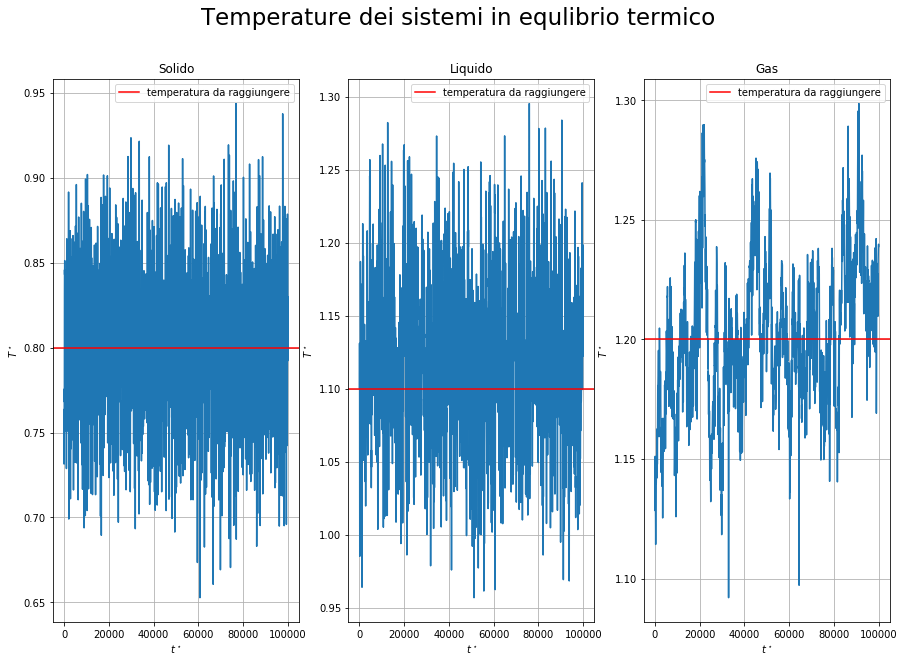

In [2]:
plt.figure(figsize=(15,10))
plt.suptitle('Temperature dei sistemi in equlibrio termico',fontsize=23)

plt.subplot(1,3,1)

y = np.loadtxt("Solido/output_temp.dat", usecols=(0), unpack='true')
plt.plot(y)
plt.axhline(y=0.8,linestyle='-',color = 'red',label = 'temperatura da raggiungere')
plt.xlabel(r'$t^\star$')
plt.ylabel(r'$T^\star$')
plt.title('Solido')
plt.legend()
plt.grid(True)

plt.subplot(1,3,2)
y = np.loadtxt("Liquido/output_temp.dat", usecols=(0), unpack='true')
plt.plot(y)
plt.axhline(y=1.1,linestyle='-',color = 'red',label = 'temperatura da raggiungere')
plt.xlabel(r'$t^\star$')
plt.ylabel(r'$T^\star$')
plt.title('Liquido')
plt.legend()
plt.grid(True)

plt.subplot(1,3,3)
y = np.loadtxt("Gas/output_temp.dat", usecols=(0), unpack='true')
plt.plot(y)
plt.axhline(y=1.2,linestyle='-',color = 'red',label = 'temperatura da raggiungere')
plt.legend()
plt.xlabel(r'$t^\star$')
plt.ylabel(r'$T^\star$')
plt.title('Gas')
plt.grid(True)
plt.show()

Dopo la fase di equilibrazione, il sistema viene lasciato evolvere per $100$ (nblock) blocchi da $1000$ (nstep) passi l'uno. Ogni $10$ passi vengono calcolate temperatura, energia cinetica, energia potenziale, energia totale e pressione e salvate su un appositi file.
Infine questi valor istantanei delle grandezze di interesse vengono utilizzati per effettuare il data blocking con $N=100$ blocchi dal $L=1000$ dati l'uno. Di seguito sono riportati i risultati sia per l'Argon sia per il Krypton i quali hanno il medesimo andamento funzionale ma riscalamenti diversi delle stesse grandezze adimensionate.

# Argon

#### Parametri per riscalamento 

In [3]:
sigma=0.34 #nm
e_fratto_kb= 120. #K
m=39.948 #amu

epsilon= e_fratto_kb*1.38*10**(-23) #J
m= m*1.66*10**(-27) #kg
sigma=0.34*(10**(-9)) #m
t= 1./np.sqrt(epsilon/(m*(sigma**2))) #s
p=epsilon/(sigma**3)

### Solido

Per quanto rigurada il solido:
* la temperatura converge entro l'errore a $T =96.6 K$ per cui il sistema è all'equlibrio alla temperatura desirata.
* L'energia potenziale è di un ordine di grandezza maggiore di quella cinetica, segno del fatto che il sistema è solido.
* Dopo una prima fase di statbilizzazione, l'energia totale è conservata entro due volte l'errore associato come richiesto per una simulazione nell'inseme micro-canonico.
* La pressione è molto maggiore di quella atmosferica come atteso perchè si formi un solido di gas nobile. 

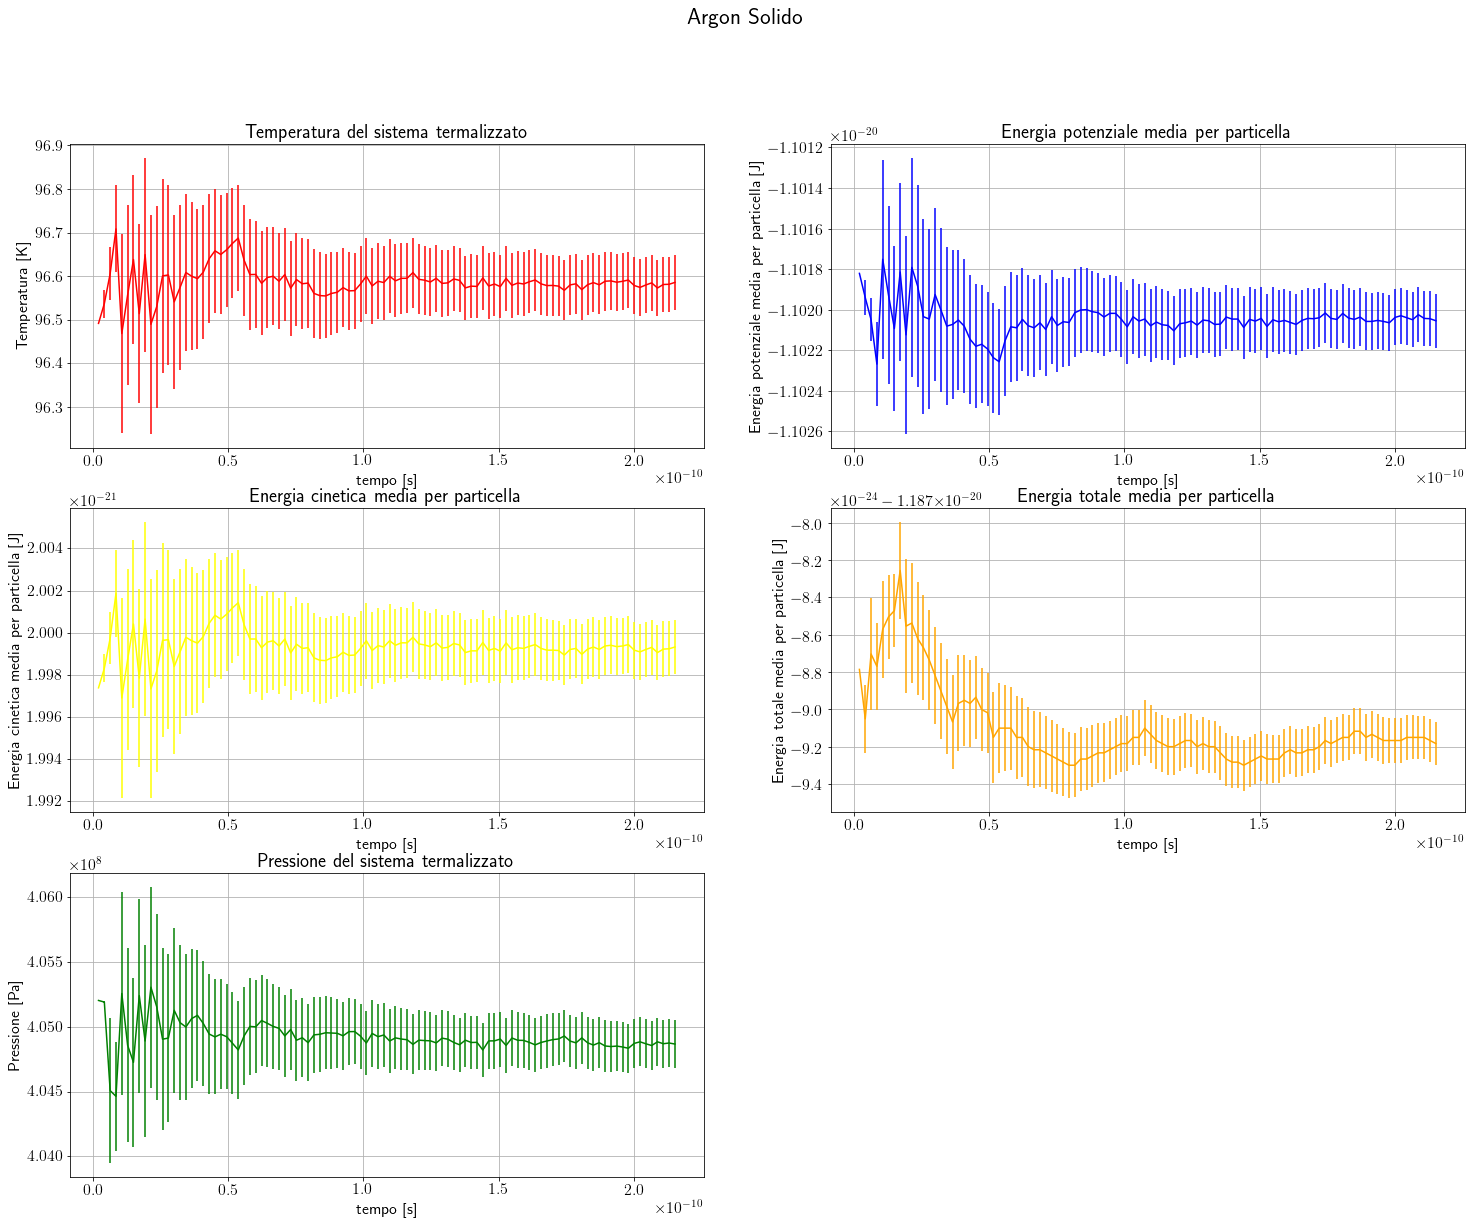

In [18]:
plt.rc('text', usetex=True)
plt.rcParams['font.size']=16
plt.figure(figsize=(25,19))
plt.suptitle('Argon Solido',fontsize=23)

plt.subplot(3,2,1)
x, y, error = np.loadtxt("Solido/ave_temp.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*e_fratto_kb,yerr=error*e_fratto_kb, color='red')
plt.xlabel('tempo [s]')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura del sistema termalizzato')
plt.grid(True)


plt.subplot(3,2,2)
x, y,error = np.loadtxt("Solido/ave_epot_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color = 'blue')
plt.xlabel('tempo [s]')
plt.ylabel('Energia potenziale media per particella [J]')
plt.title('Energia potenziale media per particella')
plt.grid(True)


plt.subplot(3,2,3)
x, y, error = np.loadtxt("Solido/ave_ekin.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='yellow')
plt.xlabel('tempo [s]')
plt.ylabel('Energia cinetica media per particella  [J]')
plt.title('Energia cinetica media per particella')
plt.grid(True)


plt.subplot(3,2,4)
x, y, error = np.loadtxt("Solido/ave_etot_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='orange')
plt.xlabel('tempo [s]')
plt.ylabel('Energia totale media per particella  [J]')
plt.title('Energia totale media per particella')
plt.grid(True)


plt.subplot(3,2,5)
x, y, error = np.loadtxt("Solido/ave_pres_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*p,yerr=error*p, color='green')
plt.xlabel('tempo [s]')
plt.ylabel('Pressione [Pa]')
plt.title('Pressione del sistema termalizzato')
plt.grid(True)

plt.show()

### Liquido

Per quanto riguarda la fase liquida:
* la temperatura inizialmente varia, dopo $0.08$ ns converge entro l'errore a $T =135.2 \; K$ che è compatibile entro l'errore con quelle che il sistema dovrebbe raggiungere  $132 \; K$.
* L'energia potenziale è dello stesso di grandezza maggiore di quella cinetica, segno del fatto che il sistema è liquido
* L'energia totale invece è ben conservata dal sistema come è auspicabile per una simulazione dell'inisieme micro-canonico.
* La pressione è molto maggiore di quella atmosferica come atteso perchè si formi un liquido di gas nobile. 

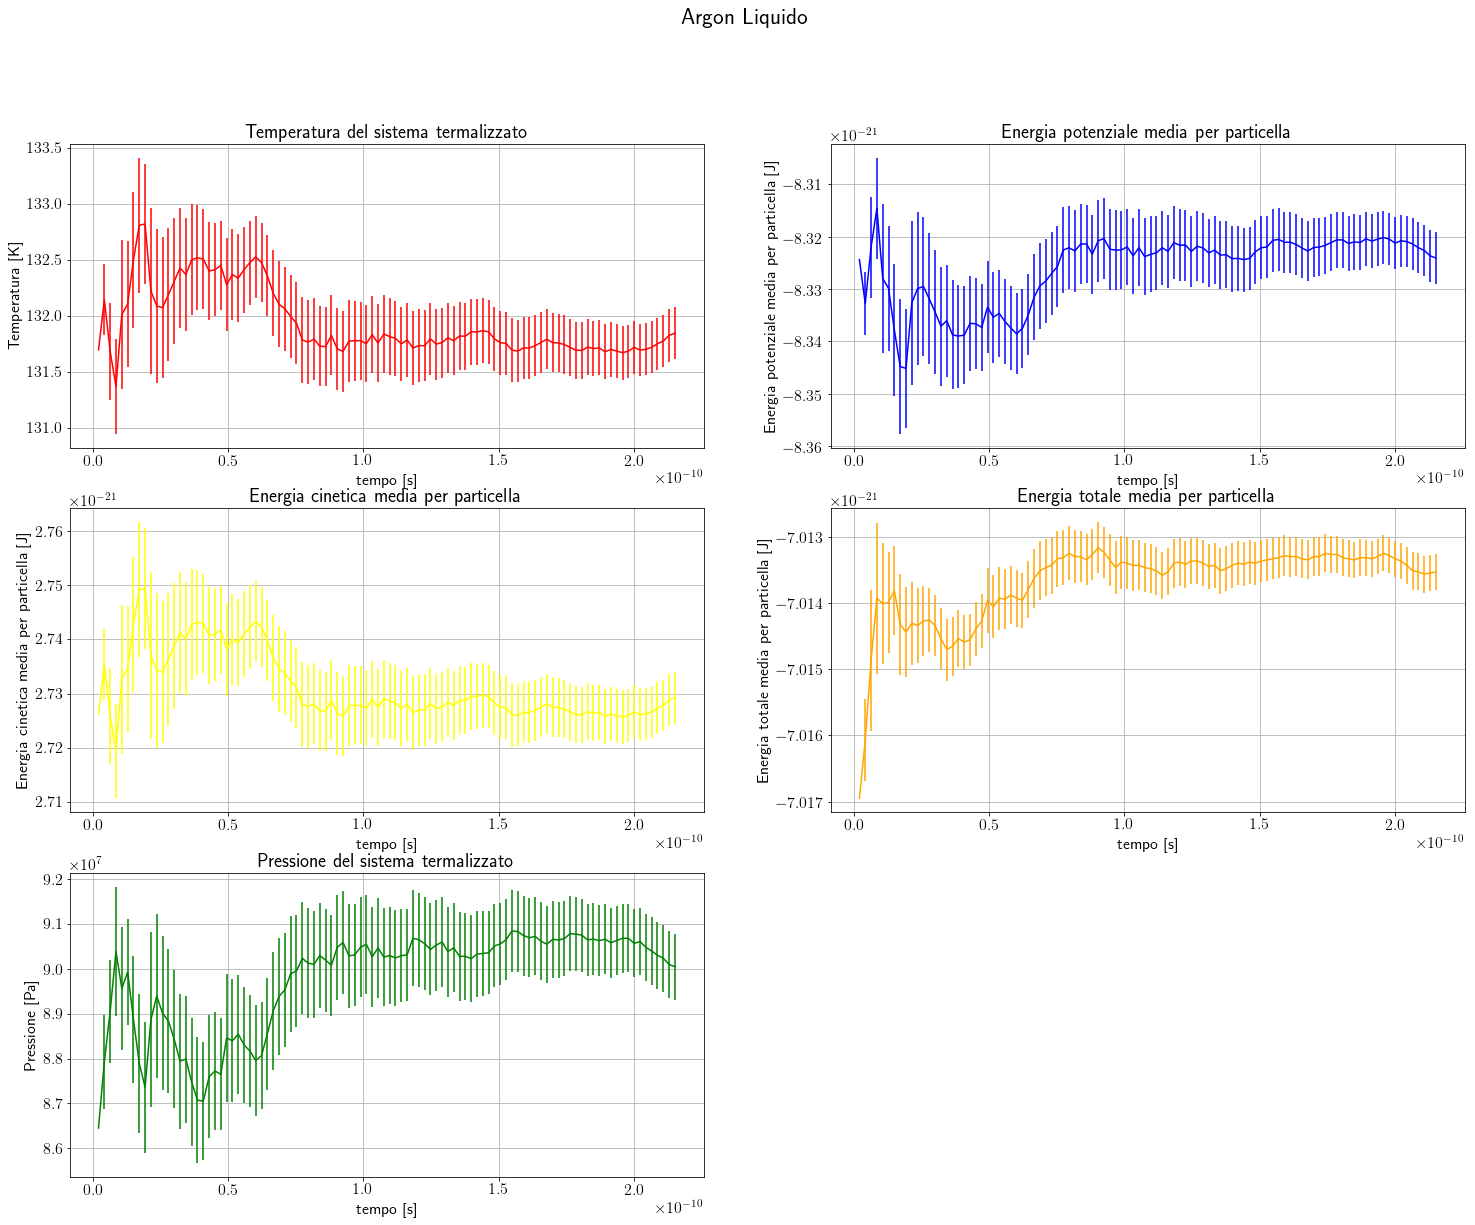

In [19]:
plt.rc('text', usetex=True)
plt.rcParams['font.size']=16
plt.figure(figsize=(25,19))
plt.suptitle('Argon Liquido',fontsize=23)

plt.subplot(3,2,1)
x, y, error = np.loadtxt("Liquido/ave_temp.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*e_fratto_kb,yerr=error*e_fratto_kb, color='red')
plt.xlabel('tempo [s]')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura del sistema termalizzato')
plt.grid(True)


plt.subplot(3,2,2)
x, y, error = np.loadtxt("Liquido/ave_epot_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color = 'blue')
plt.xlabel('tempo [s]')
plt.ylabel('Energia potenziale media per particella [J]')
plt.title('Energia potenziale media per particella')
plt.grid(True)

plt.subplot(3,2,3)
x, y, error = np.loadtxt("Liquido/ave_ekin.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='yellow')
plt.xlabel('tempo [s]')
plt.ylabel('Energia cinetica media per particella  [J]')
plt.title('Energia cinetica media per particella')
plt.grid(True)

plt.subplot(3,2,4)
x, y, error = np.loadtxt("Liquido/ave_etot_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='orange')
plt.xlabel('tempo [s]')
plt.ylabel('Energia totale media per particella  [J]')
plt.title('Energia totale media per particella')
plt.grid(True)

plt.subplot(3,2,5)
x, y, error = np.loadtxt("Liquido/ave_pres_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*p,yerr=error*p, color='green')
plt.xlabel('tempo [s]')
plt.ylabel('Pressione [Pa]')
plt.title('Pressione del sistema termalizzato')
plt.grid(True)

plt.show()

##  Gas

Per quanto riguarda la fase gassosa si osserva che il raggiungimento dell'equlibrio è decisamente più lento rispetto ai casi precendeti nonostante il maggior numero di integrazioni dell'equazione del moto nella fase di equlibrazione:
* la temperatura continua a variare fino agli $0.13$ ns quando il sistema raggiunge $T =144 \; K$ che è compatibile entro l'errore con la temperatura attesa $144 \; K$. Si osserva però che sul fnale della simulazione la temperatura si discosta da $144 \; K$ rimanando compatibile entro due volte l'errore associato. Al raggiungimento di tale temperatura il sistema ha effettivamente raggiunto l'equilibrio.
* L'energia potenziale è di un ordine di grandezza minore di quella cinetica, segno del fatto che il sistema è gassoso.
* L'energia totale è conservata entro l'errore, come richiesto per una simulazione affidabile.
* La pressione pur rimanendo maggiore di quella atmosferica decresce di un ordine di granzedezza rispetto a quella del solido e del liquido.

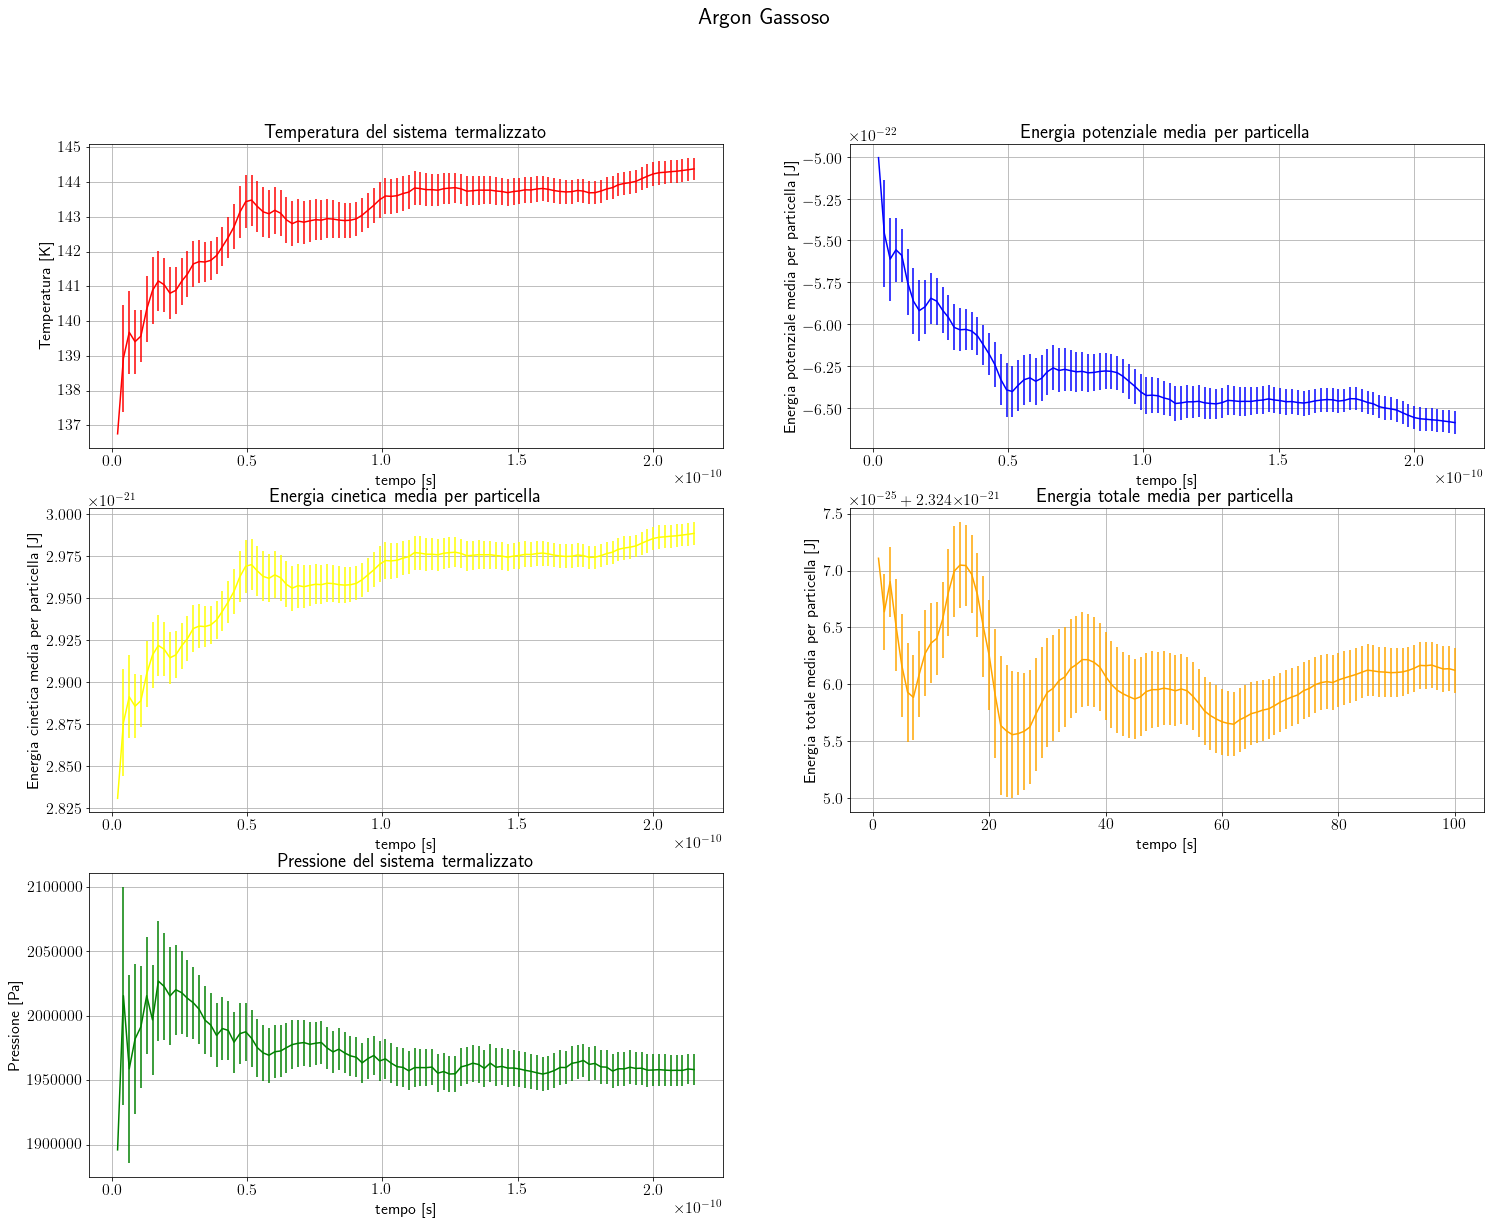

In [4]:
plt.rc('text', usetex=True)
plt.rcParams['font.size']=16
plt.figure(figsize=(25,19))
plt.suptitle('Argon Gassoso',fontsize=23)

plt.subplot(3,2,1)
x, y, error = np.loadtxt("Gas/ave_temp.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*e_fratto_kb,yerr=error*e_fratto_kb, color='red')
plt.xlabel('tempo [s]')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura del sistema termalizzato')
plt.grid(True)


plt.subplot(3,2,2)
x, y, error = np.loadtxt("Gas/ave_epot_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color = 'blue')
plt.xlabel('tempo [s]')
plt.ylabel('Energia potenziale media per particella [J]')
plt.title('Energia potenziale media per particella')
plt.grid(True)

plt.subplot(3,2,3)
x, y, error = np.loadtxt("Gas/ave_ekin.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='yellow')
plt.xlabel('tempo [s]')
plt.ylabel('Energia cinetica media per particella  [J]')
plt.title('Energia cinetica media per particella')
plt.grid(True)

plt.subplot(3,2,4)
x, y, error = np.loadtxt("Gas/ave_etot_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x,y*epsilon,yerr=error*epsilon, color='orange')
plt.xlabel('tempo [s]')
plt.ylabel('Energia totale media per particella  [J]')
plt.title('Energia totale media per particella')
plt.grid(True)

plt.subplot(3,2,5)
x, y, error = np.loadtxt("Gas/ave_pres_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*p,yerr=error*p, color='green')
plt.xlabel('tempo [s]')
plt.ylabel('Pressione [Pa]')
plt.title('Pressione del sistema termalizzato')
plt.grid(True)

plt.show()

# Krypton

Essendo i risulati del Krypton analoghi a quelli dell'Argon poichè si ottengono tramite riscalamento i commenti sotto riportati sono analoghi a quelli dell Argon

#### Parametri per riscalamento

In [8]:
sigma=0.364 #nm
e_fratto_kb= 164. #K
m=83.798 #amu

epsilon= e_fratto_kb*1.38*10**(-23) #J
m= m*1.66*10**(-27) #kg
sigma=0.34*10**(-9) #m
t= 1./np.sqrt(epsilon/(m*(sigma**2))) #s
p=epsilon/sigma**3

## Solido

Per quanto riguarda il solido:
* la temperatura converge entro l'errore a $T =132 \; K$ per cui il sistema è all'equilibrio alla temperatura desirata.
* L'energia potenziale è di un ordine di grandezza maggiore di quella cinetica, segno del fatto che il sistema è solido.
* Dopo una prima fase di stabilizzazione, l'energia totale è conservata entro due volte l'errore associato come richiesto per una simulazione nell'inseme micro-canonico.
* La pressione è molto maggiore di quella atmosferica come atteso perchè si formi un solido di gas nobile. 

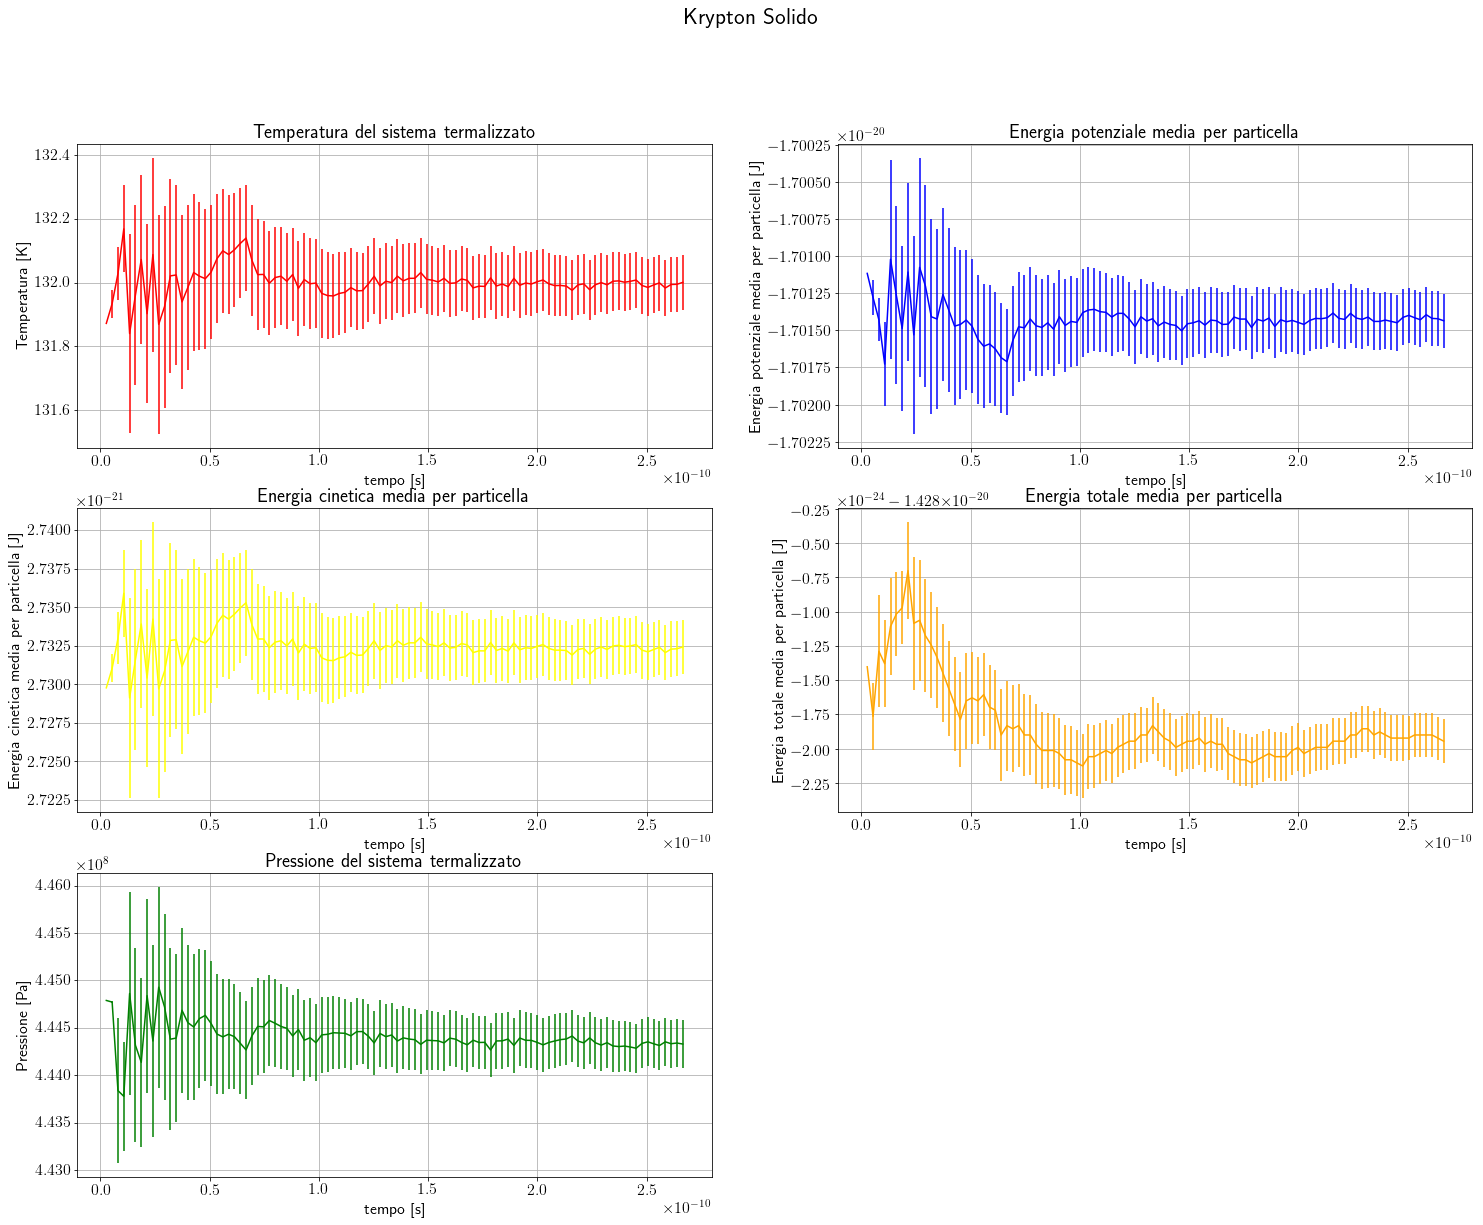

In [9]:
plt.rc('text', usetex=True)
plt.rcParams['font.size']=16
plt.figure(figsize=(25,19))
plt.suptitle('Krypton Solido',fontsize=23)

plt.subplot(3,2,1)
x, y, error = np.loadtxt("Solido/ave_temp.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*e_fratto_kb,yerr=error*e_fratto_kb, color='red')
plt.xlabel('tempo [s]')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura del sistema termalizzato')
plt.grid(True)


plt.subplot(3,2,2)
x, y,error = np.loadtxt("Solido/ave_epot.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color = 'blue')
plt.xlabel('tempo [s]')
plt.ylabel('Energia potenziale media per particella [J]')
plt.title('Energia potenziale media per particella')
plt.grid(True)


plt.subplot(3,2,3)
x, y, error = np.loadtxt("Solido/ave_ekin.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='yellow')
plt.xlabel('tempo [s]')
plt.ylabel('Energia cinetica media per particella  [J]')
plt.title('Energia cinetica media per particella')
plt.grid(True)


plt.subplot(3,2,4)
x, y, error = np.loadtxt("Solido/ave_etot.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='orange')
plt.xlabel('tempo [s]')
plt.ylabel('Energia totale media per particella  [J]')
plt.title('Energia totale media per particella')
plt.grid(True)


plt.subplot(3,2,5)
x, y, error = np.loadtxt("Solido/ave_pres.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*p,yerr=error*p, color='green')
plt.xlabel('tempo [s]')
plt.ylabel('Pressione [Pa]')
plt.title('Pressione del sistema termalizzato')
plt.grid(True)

plt.show()

## Liquido

Per quanto riguarda la fase liquida:
* la temperatura inizialmente varia, dopo $0.08$ ns converge entro l'errore a $T =180 \; K$ che è compatibile entro l'errore con quella che il sistema dovrebbe raggiungere $180.4 \; K$.
* L'energia potenziale è dello stesso di grandezza maggiore di quella cinetica, segno del fatto che il sistema è liquido
* L'energia totale è ben conservata dal sistema come è auspicabile per una simulazione dell'inisieme micro-canonico.
* La pressione è molto maggiore di quella atmosferica come atteso perchè si formi un liquido di gas nobile. 

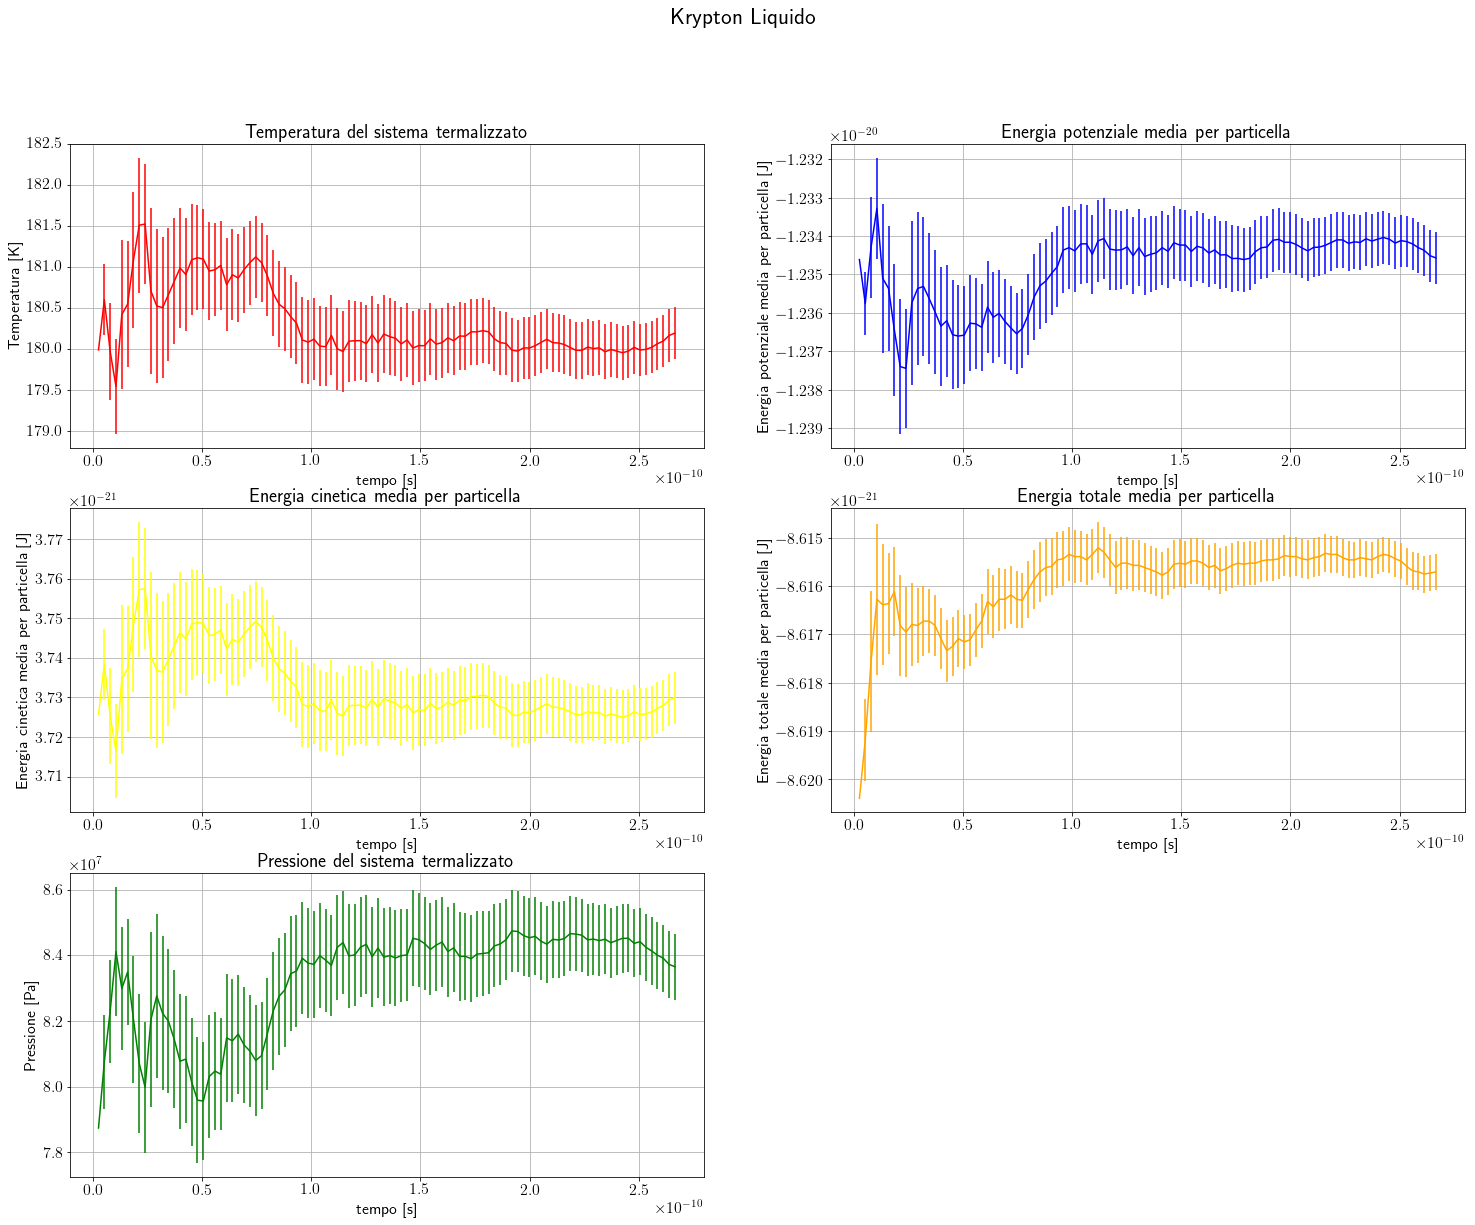

In [10]:
plt.rc('text', usetex=True)
plt.rcParams['font.size']=16
plt.figure(figsize=(25,19))
plt.suptitle('Krypton Liquido',fontsize=23)

plt.subplot(3,2,1)
x, y, error = np.loadtxt("Liquido/ave_temp.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*e_fratto_kb,yerr=error*e_fratto_kb, color='red')
plt.xlabel('tempo [s]')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura del sistema termalizzato')
plt.grid(True)


plt.subplot(3,2,2)
x, y, error = np.loadtxt("Liquido/ave_epot.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color = 'blue')
plt.xlabel('tempo [s]')
plt.ylabel('Energia potenziale media per particella [J]')
plt.title('Energia potenziale media per particella')
plt.grid(True)

plt.subplot(3,2,3)
x, y, error = np.loadtxt("Liquido/ave_ekin.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='yellow')
plt.xlabel('tempo [s]')
plt.ylabel('Energia cinetica media per particella  [J]')
plt.title('Energia cinetica media per particella')
plt.grid(True)

plt.subplot(3,2,4)
x, y, error = np.loadtxt("Liquido/ave_etot.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='orange')
plt.xlabel('tempo [s]')
plt.ylabel('Energia totale media per particella  [J]')
plt.title('Energia totale media per particella')
plt.grid(True)

plt.subplot(3,2,5)
x, y, error = np.loadtxt("Liquido/ave_pres.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*p,yerr=error*p, color='green')
plt.xlabel('tempo [s]')
plt.ylabel('Pressione [Pa]')
plt.title('Pressione del sistema termalizzato')
plt.grid(True)

plt.show()

## Gas

Per quanto riguarda la fase gassosa si osserva che il raggiungimento dell'equlibrio è decisamente più lento rispetto ai casi precendeti nonostante il maggior numero di integrazioni dell'equazione del moto nella fase di equlibrazione:

* la temperatura continua a variare fino agli $0.07$ ns quando il sistema raggiunge $T =196.8 \; K$ che è compatibile entro e l'errore con le temperatura attessa di $196.8 \; K$. Si osserva però che sul finale della simulazione la temperatura si discosta da $196.8 \; K$ rimanando compatibile entro due volte l'errore associato.
* L'energia potenziale è di un ordine di grandezza minore di quella cinetica, segno del fatto che il sistema è gassoso.
* L'energia totale è conservata entro l'errore, come richiesto per una simulazione affidabile.
* La pressione pur rimanendo maggiore di quella atmosferica decresce di un ordine di granzedezza rispetto a quella del solido e del liquido.

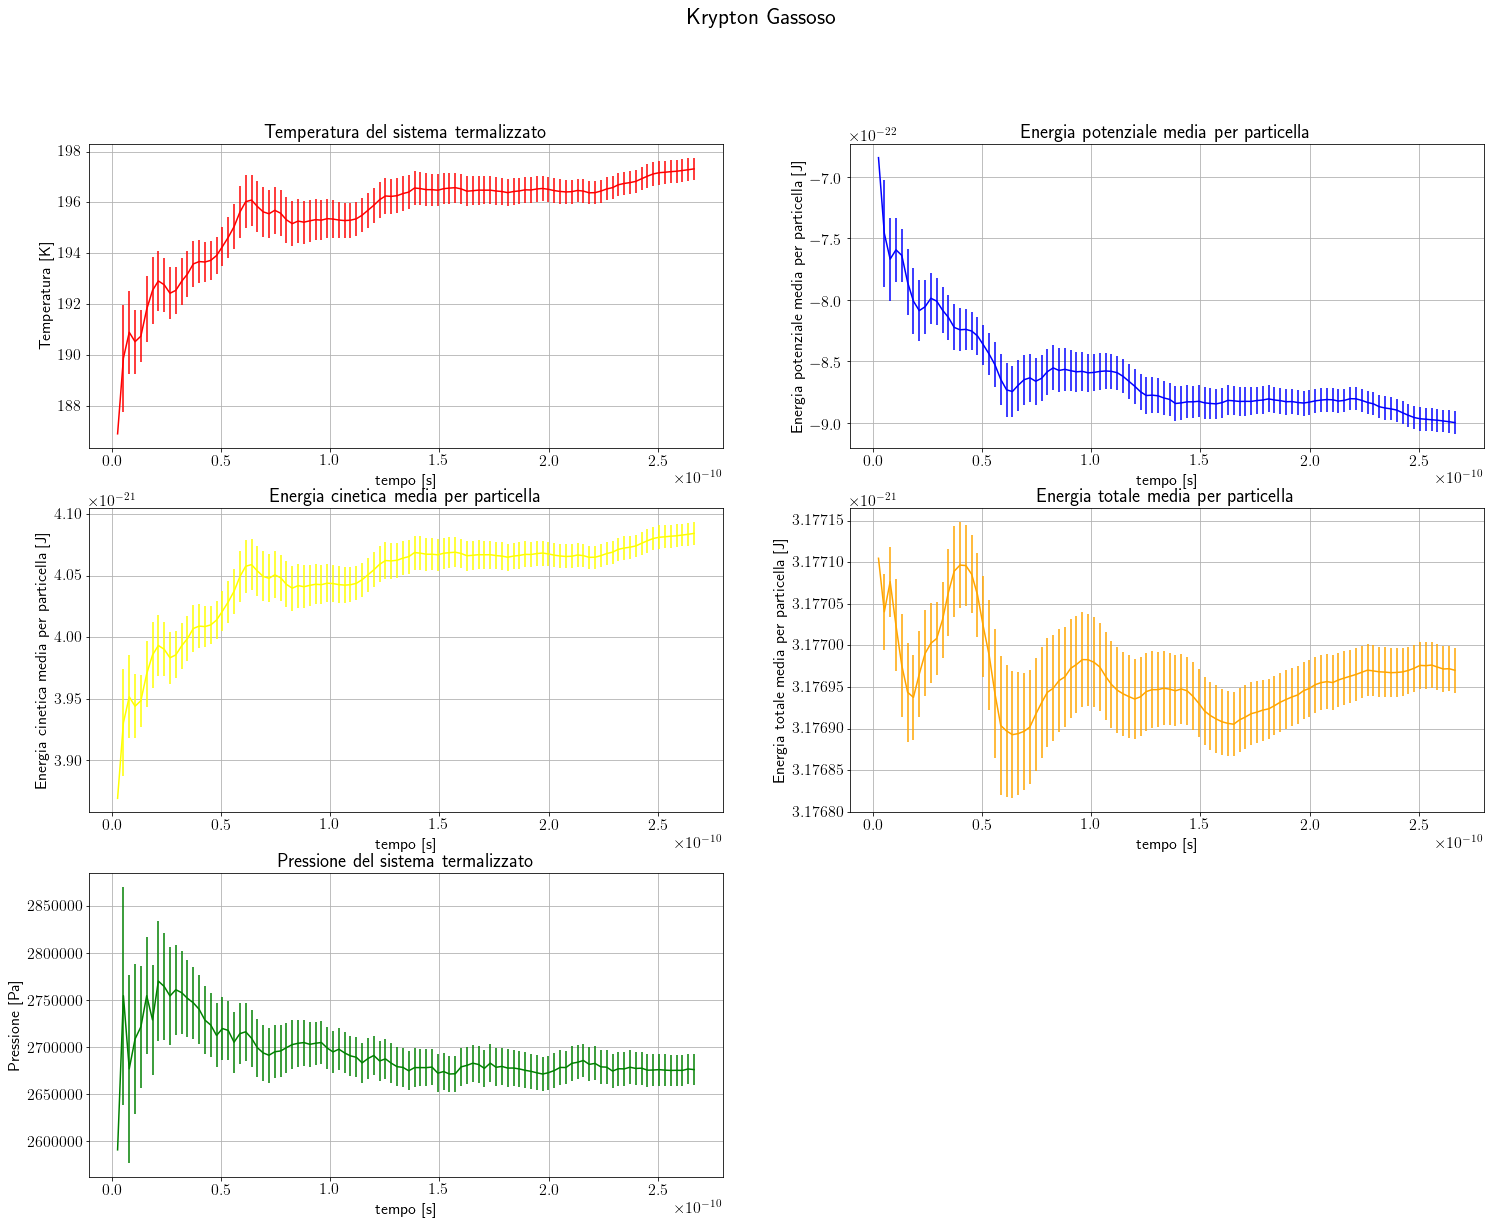

In [11]:
plt.rc('text', usetex=True)
plt.rcParams['font.size']=16
plt.figure(figsize=(25,19))
plt.suptitle('Krypton Gassoso',fontsize=23)

plt.subplot(3,2,1)
x, y, error = np.loadtxt("Gas/ave_temp.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*e_fratto_kb,yerr=error*e_fratto_kb, color='red')
plt.xlabel('tempo [s]')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura del sistema termalizzato')
plt.grid(True)


plt.subplot(3,2,2)
x, y, error = np.loadtxt("Gas/ave_epot_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color = 'blue')
plt.xlabel('tempo [s]')
plt.ylabel('Energia potenziale media per particella [J]')
plt.title('Energia potenziale media per particella')
plt.grid(True)

plt.subplot(3,2,3)
x, y, error = np.loadtxt("Gas/ave_ekin.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='yellow')
plt.xlabel('tempo [s]')
plt.ylabel('Energia cinetica media per particella  [J]')
plt.title('Energia cinetica media per particella')
plt.grid(True)

plt.subplot(3,2,4)
x, y, error = np.loadtxt("Gas/ave_etot_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*epsilon,yerr=error*epsilon, color='orange')
plt.xlabel('tempo [s]')
plt.ylabel('Energia totale media per particella  [J]')
plt.title('Energia totale media per particella')
plt.grid(True)

plt.subplot(3,2,5)
x, y, error = np.loadtxt("Gas/ave_pres_0.0", usecols=(0,2,3), unpack='true')
plt.errorbar(x*t,y*p,yerr=error*p, color='green')
plt.xlabel('tempo [s]')
plt.ylabel('Pressione [Pa]')
plt.title('Pressione del sistema termalizzato')
plt.grid(True)

plt.show()